# UBER Pickups 
### WEEK ANALYSIS

In [1]:
!pip install plotly==4.9.0
!pip install jupyterlab "ipywidgets>=7.5"
!jupyter labextension install jupyterlab-plotly@4.9.0
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.9.0
!jupyter labextension list

-\|/-\|/-An error occured.
ValueError: 
"jupyterlab-plotly@4.9.0" is not compatible with the current JupyterLab
Conflicting Dependencies:
JupyterLab                        Extension      Package
>=3.0.8 <3.1.0                    >=1.3.0 <2.0.0||>=2.0.0 <3.0.0@jupyterlab/rendermime-interfaces
See the log file for details:  /tmp/jupyterlab-debug-2dp571_j.log
-\|/-\|/-\|/-\|/-\|/--\|/-\|/-\Building jupyterlab assets (production, minimized)
-\|/-\|/-\|/-\-\|/-\|/-\-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/

In [2]:
!jupyter lab build

[LabBuildApp] JupyterLab 3.0.15
[LabBuildApp] Building in /usr/local/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (production, minimized)
-\|/-\|/-\|/-\|-\|/-\|/-\-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|

## CLUSTERING

In [3]:
# Importing usefull libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
import plotly.express as px

In [4]:
# Importing the pre-cleaned dataset with gps information for week 36

X = pd.read_csv('uber_pickups_week36.csv')
X.head()

,Lat,Lon,dayofweek
0,40.2201,-74.0021,0
1,40.7500,-74.0027,0
2,40.7559,-73.9864,0
3,40.7450,-73.9889,0
4,40.8145,-73.9444,0


In [5]:
# Keeping only 10000 rows
X = X.sample(10000)
X.shape

(10000, 3)

In [6]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [13]:
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value K
wcss =  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 30000.0
WCSS for K=2 --> 22655.4847977552
WCSS for K=3 --> 17336.535661187554
WCSS for K=4 --> 14523.095569328332
WCSS for K=5 --> 12859.885092509421
WCSS for K=6 --> 11650.177419072155
WCSS for K=7 --> 10520.263668374315
WCSS for K=8 --> 9479.450293896743
WCSS for K=9 --> 8571.651127396306
WCSS for K=10 --> 7886.749858980085


Text(0, 0.5, 'Inertia')

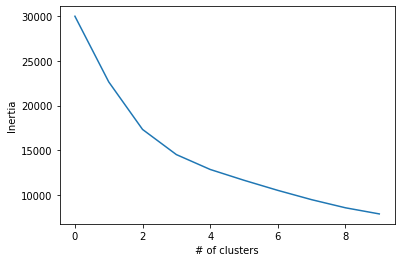

In [14]:
# Visualizing the inertia against the number of clusters

wcss_frame = pd.DataFrame(wcss)
sns.lineplot(x = wcss_frame.index, y = wcss_frame.iloc[: , -1], data = wcss_frame)
plt.xlabel('# of clusters')
plt.ylabel('Inertia')

In [15]:
# Computing mean silhouette score
sil = []
for i in range (2,6): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X_norm)
    sil.append(silhouette_score(X_norm, kmeans.predict(X_norm)))
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.31361599554229885
Silhouette score for K=3 is 0.34739995320617983
Silhouette score for K=4 is 0.3483339533380976
Silhouette score for K=5 is 0.28981485727768613


Text(0.42499999999999716, 0.5, 'Silhouette score')

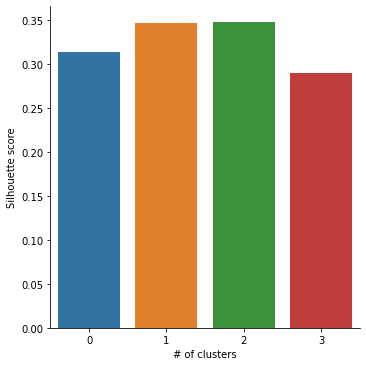

In [16]:
# Visualizing the inertia against the number of clusters

sil_frame = pd.DataFrame(sil)
sns.catplot(x = sil_frame.index, y = sil_frame.iloc[: , -1], data = sil_frame, kind = 'bar')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')

### BUILDING CLUSTERS

In [17]:
# Instancing and predicting

db = DBSCAN(eps = 0.5, min_samples = 90, metric = 'l2')
db.fit(X_norm)
y = db.fit_predict(X_norm)

In [18]:
# Adding the cluster number to the original dataset
X["cluster"] = y

In [24]:
# Recomputing true values for visualization
from sklearn.cluster import KMeans 
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

### VISUALIZING ON A MAP

In [25]:
fig = px.scatter_mapbox(X, lat = 'Lat', 
                        lon = 'Lon', 
                        color = "cluster", 
                        zoom = 10, 
                        mapbox_style = "carto-positron",
                        animation_frame = "dayofweek")

fig.show()

In [26]:
#import plotly.io as pio
#pio.write_html(fig, "Kmeans_clustering-uber_pickups_1_09_6PM.html")